In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm

In [2]:
df = pd.read_csv('SA17A-contr.csv', index_col=0)
df.head()

,cand_nm,contbr_nm,contbr_city,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,form_tp,tran_id,election_tp
0,"Trump, Donald J.","NICHOLS, ROBERT",WASHINGTON,20008.0,"NICHOLS DESIGN ASSOCIATES, INC.",ARCHITECT,250.0,2016-12-10,SA17A,SA17A.425120,G2016
23,"Trump, Donald J.","NEVIUS, TED",WASHINGTON,20007.0,RETIRED,RETIRED,35.0,2018-01-03,SA17A,SA17A.1061963,P2020
26,"Trump, Donald J.","NEVIUS, TED",WASHINGTON,20007.0,RETIRED,RETIRED,35.0,2018-04-03,SA17A,SA17A.1274477,P2020
29,"Trump, Donald J.","KNIGHT, SHAREN",WASHINGTON,20037.0,RETIRED,RETIRED,100.0,2017-12-30,SA17A,SA17A.1019056,P2020
41,"Trump, Donald J.","MOCEK, GREGORY",WASHINGTON,20007.0,CADWALADER,ATTORNEY,-2700.0,2017-01-20,SA17A,SA17A.445455,G2016


In [3]:
df.dtypes

cand_nm               object
contbr_nm             object
contbr_city           object
contbr_zip           float64
contbr_employer       object
contbr_occupation     object
contb_receipt_amt    float64
contb_receipt_dt      object
form_tp               object
tran_id               object
election_tp           object
dtype: object

In [4]:
# convert zip to 5 num string 
df['contbr_zip'] = df.contbr_zip.astype('str')
df.contbr_zip = df['contbr_zip'].apply(lambda x: x[0:5])

In [5]:
# convert receipt date to datetime format 
df.contb_receipt_dt = pd.to_datetime(df.contb_receipt_dt)
df.dtypes

cand_nm                      object
contbr_nm                    object
contbr_city                  object
contbr_zip                   object
contbr_employer              object
contbr_occupation            object
contb_receipt_amt           float64
contb_receipt_dt     datetime64[ns]
form_tp                      object
tran_id                      object
election_tp                  object
dtype: object

In [6]:
df.head()

,cand_nm,contbr_nm,contbr_city,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,form_tp,tran_id,election_tp
0,"Trump, Donald J.","NICHOLS, ROBERT",WASHINGTON,20008,"NICHOLS DESIGN ASSOCIATES, INC.",ARCHITECT,250.0,2016-12-10,SA17A,SA17A.425120,G2016
23,"Trump, Donald J.","NEVIUS, TED",WASHINGTON,20007,RETIRED,RETIRED,35.0,2018-01-03,SA17A,SA17A.1061963,P2020
26,"Trump, Donald J.","NEVIUS, TED",WASHINGTON,20007,RETIRED,RETIRED,35.0,2018-04-03,SA17A,SA17A.1274477,P2020
29,"Trump, Donald J.","KNIGHT, SHAREN",WASHINGTON,20037,RETIRED,RETIRED,100.0,2017-12-30,SA17A,SA17A.1019056,P2020
41,"Trump, Donald J.","MOCEK, GREGORY",WASHINGTON,20007,CADWALADER,ATTORNEY,-2700.0,2017-01-20,SA17A,SA17A.445455,G2016


In [7]:
df = df.loc[df.contb_receipt_amt > 1]
df.head()

,cand_nm,contbr_nm,contbr_city,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,form_tp,tran_id,election_tp
0,"Trump, Donald J.","NICHOLS, ROBERT",WASHINGTON,20008,"NICHOLS DESIGN ASSOCIATES, INC.",ARCHITECT,250.0,2016-12-10,SA17A,SA17A.425120,G2016
23,"Trump, Donald J.","NEVIUS, TED",WASHINGTON,20007,RETIRED,RETIRED,35.0,2018-01-03,SA17A,SA17A.1061963,P2020
26,"Trump, Donald J.","NEVIUS, TED",WASHINGTON,20007,RETIRED,RETIRED,35.0,2018-04-03,SA17A,SA17A.1274477,P2020
29,"Trump, Donald J.","KNIGHT, SHAREN",WASHINGTON,20037,RETIRED,RETIRED,100.0,2017-12-30,SA17A,SA17A.1019056,P2020
42,"Trump, Donald J.","ROSE, JUDAH",WASHINGTON,20007,ICF,CONSULTANT,35.0,2018-06-19,SA17A,SA17A.1289423,P2020


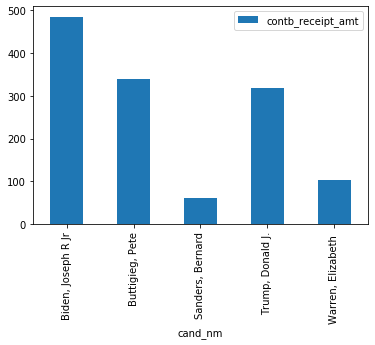

In [8]:
df.groupby('cand_nm').mean().plot.bar()

In [9]:
# standard scaling
outcome = 'cand_nm'
x_cols = ['contb_receipt_amt']
for col in x_cols:
      df[col] = (df[col] - df[col].mean())/df[col].std()
df.head()

,cand_nm,contbr_nm,contbr_city,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,form_tp,tran_id,election_tp
0,"Trump, Donald J.","NICHOLS, ROBERT",WASHINGTON,20008,"NICHOLS DESIGN ASSOCIATES, INC.",ARCHITECT,0.047819,2016-12-10,SA17A,SA17A.425120,G2016
23,"Trump, Donald J.","NEVIUS, TED",WASHINGTON,20007,RETIRED,RETIRED,-0.280724,2018-01-03,SA17A,SA17A.1061963,P2020
26,"Trump, Donald J.","NEVIUS, TED",WASHINGTON,20007,RETIRED,RETIRED,-0.280724,2018-04-03,SA17A,SA17A.1274477,P2020
29,"Trump, Donald J.","KNIGHT, SHAREN",WASHINGTON,20037,RETIRED,RETIRED,-0.181397,2017-12-30,SA17A,SA17A.1019056,P2020
42,"Trump, Donald J.","ROSE, JUDAH",WASHINGTON,20007,ICF,CONSULTANT,-0.280724,2018-06-19,SA17A,SA17A.1289423,P2020


In [10]:
def trump(val):
    if val == 'Trump, Donald J.':
        val = 1  
    else:
        val = 0 
    return val

In [11]:
df['cand_val'] = df.cand_nm.apply(lambda x: trump(x))
df.describe()

,contb_receipt_amt,cand_val
count,1.191300e+04,11913.000000
mean,6.241144e-15,0.025267
std,1.000000e+00,0.156940
min,-3.326336e-01,0.000000
25%,-2.960048e-01,0.000000
50%,-2.578022e-01,0.000000
75%,-1.813968e-01,0.000000
max,6.354180e+01,1.000000


In [12]:
df = df.drop(df['contb_receipt_amt'].idxmax())
df.groupby('cand_val').mean()

,contb_receipt_amt
cand_val,
0,-0.003902
1,-0.060783


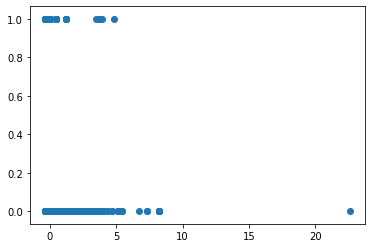

In [13]:
plt.scatter(df.contb_receipt_amt, df.cand_val)
plt.show()

In [14]:
# predictor variable 
X = df['contb_receipt_amt'].values

# target variable
y = df['cand_val']

X = sm.add_constant(X)
model = sm.OLS(y,X, hasconst=False)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               cand_val   R-squared (uncentered):                   0.025
Model:                            OLS   Adj. R-squared (uncentered):              0.025
Method:                 Least Squares   F-statistic:                              154.6
Date:                Sun, 20 Oct 2019   Prob (F-statistic):                    5.27e-67
Time:                        20:17:59   Log-Likelihood:                          5177.4
No. Observations:               11912   AIC:                                 -1.035e+04
Df Residuals:                   11910   BIC:                                 -1.034e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0252      0.001     17.534      0.000       0.022       0.028
x1            -0.0021      0.002     -1.196      0.232      -0.006       0.001
==============================================================================
Omnibus:                    13241.042   Durbin-Watson:                   0.209
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           671357.955
Skew:                           6.060   Prob(JB):                         0.00
Kurtosis:                      37.724   Cond. No.                         1.23
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""